[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mravanba/comp551-notebooks/blob/master/LinearRegression.ipynb)


# Linear Regression
Lets define a linear regression class, with the usual fit and predict methods.

In [1]:
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')

In [2]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass
    
    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1
        #alternatively: self.w = np.linalg.inv(x.T @ x)@x.T@y
        self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference
        return self
    
    def predict(self, x):
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w                             #predict the y values
        return yh


fit this linear model to toy data with $x \in \Re^1$ + a bias parameter

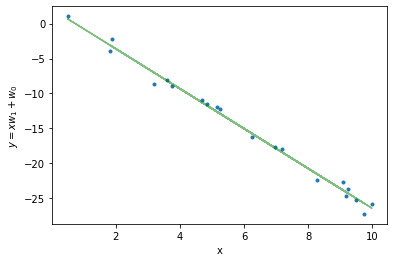

In [3]:
N = 20
x = np.random.rand(N) * 10              #generate N random numbers from 0-10
y = -3*x + 3 + 1*np.random.randn(N)     #generate y using a linear model and add some noise
model = LinearRegression()
yh = model.fit(x,y).predict(x)
plt.plot(x, y, '.')
plt.plot(x, yh, 'g-', alpha=.5)
plt.xlabel('x')
plt.ylabel(r'$y=xw_1 + w_0$')
plt.show()

## Weight Space
Next, for the same problem we plot *cost* as a function of model parameters (weights), and show the correspondence between the different weights having different costs and their fit. 

The `plot_contour` is a helper function we use for plotting the cost function moving forward. This gives a contour plot of `f` as a functions of two parameters that range between 

In [5]:
import itertools
def plot_contour(f, x1bound, x2bound, resolution, ax):
    #function to plot the contours where f is the cost function
    x1range = np.linspace(x1bound[0], x1bound[1], resolution)
    x2range = np.linspace(x2bound[0], x2bound[1], resolution)
    xg, yg = np.meshgrid(x1range, x2range)
    zg = np.zeros_like(xg)
    for i,j in itertools.product(range(resolution), range(resolution)):
        zg[i,j] = f([xg[i,j], yg[i,j]])
    ax.contour(xg, yg, zg, 100)
    return ax

Now let's define the cost function for linear regression example above, and visualize the cost and the fit of various models (parameters).

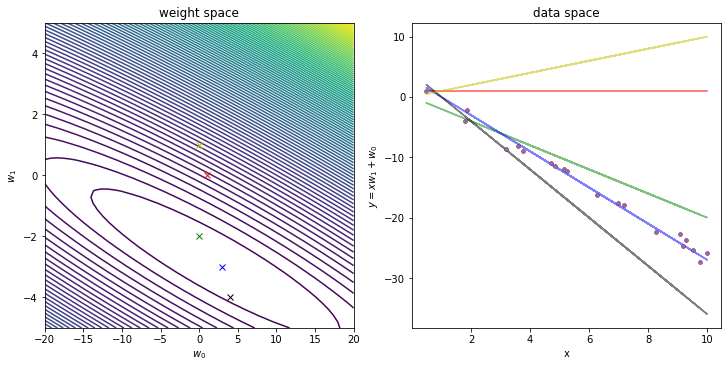

In [6]:
cost = lambda w: .5*np.mean((w[0] + w[1]*x - y)**2)         #function to compute the cost
model_list = [(1,0), (0,-2), (3,-3), (4,-4), (0,1)]              #different weights of the model you want to consider
fig, axes = plt.subplots(ncols=2, nrows=1, constrained_layout=True, figsize=(10, 5))
plot_contour(cost, [-20,20], [-5,5], 50, axes[0])           
colors = ['r','g', 'b', 'k','y']
for i, w in enumerate(model_list):
    axes[0].plot(w[0], w[1], 'x'+colors[i])                 #plot the contours
    axes[1].plot(x, y, '.')                                 #plot the points
    axes[1].plot(x, w[0]+w[1]*x, '-'+colors[i], alpha=.5)   #plot the lines
axes[0].set_xlabel(r'$w_0$')
axes[0].set_ylabel(r'$w_1$')
axes[0].set_title('weight space')
axes[1].set_xlabel('x')
axes[1].set_ylabel(r'$y=xw_1 + w_0$')
axes[1].set_title('data space')
plt.show()

In the plot above you see that the blue fit is better that others, it also has the lowest cost. 

# Nonlinear basis functions
Consider the toy dataset below. It is obvious that our attempt to model $y$ as a linear function of $x$ would produce a bad fit.
Let's try!

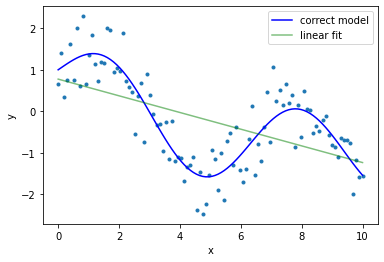

In [7]:
N = 100
x = np.linspace(0,10, N)
yt = np.sin(x) + np.cos(x**.5)                        
y = yt + .5*np.random.randn(N)                      #generate y using a non linear model and add noise
yh = model.fit(x,y).predict(x)
plt.plot(x, y, '.')
plt.plot(x, yt, 'b-', label='correct model')
plt.plot(x, yh, 'g-', alpha=.5, label='linear fit')
plt.xlabel('x')
plt.ylabel(r'y')
plt.legend()
plt.show()

one way around this is to create new features, and create a better fit using them. Right now we only have a single feature 'x' and we have a poor fit.
We can create new features out of existing ones. In this case, we create features that are Gaussian-like functions of 'x', where each feature has a different mean. 
These are called non-linear bases, because each new feature is a non-linear function of the existing one.
Note that there are many other features that you can build to better fit this data. Below, we build ten such features with 10 different mean values.
By doing this our new design matrix (called `Phi` below) had 10 features (+1 intercept that is added in the `LinearRegression` class).
Below, let's plot these non-linear bases.

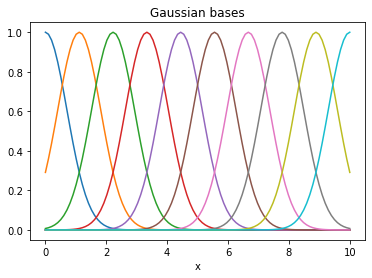

In [11]:
D=10
gaussian = lambda x,mu,sigma: np.exp(-((x-mu)/sigma)**2)          #non-linear feature function
mu = np.linspace(0,10,D)                                          #different mean values for the non-linear features
phi = gaussian(x[:,None], mu[None,:],1)                           #gives a new set of features of the existing data
for d in range(D):
    plt.plot(x, phi[:,d], '-')
plt.xlabel('x')
plt.title('Gaussian bases')
plt.show()

Now we predict `y` using `phi` as input features rather than `x`:

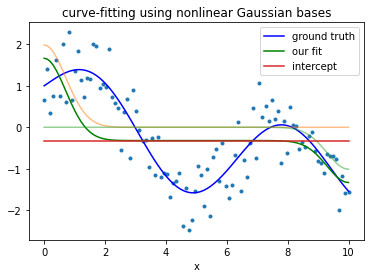

In [9]:
yh = model.fit(phi,y).predict(phi)
fig, ax = plt.subplots()
plt.plot(x, y, '.')
plt.plot(x, yt, 'b-', label='ground truth')
plt.plot(x, yh, 'g-', label='our fit')
for d in range(D):
    plt.plot(x, model.w[d]*phi[:,d], '-', alpha=.5)
plt.plot(x, model.w[-1]*np.ones_like(y), label='intercept')
plt.legend()
plt.xlabel('x')
plt.title('curve-fitting using nonlinear Gaussian bases')
plt.show()

Since our fit is a linear combination of these bases, you can see that by suming these weighted bases and the intercept, we recover our fit (green curve). Note that here we could plot all features and our prediction for $D=10$ only because all of features are functions of $x$. In general, when we have D features, we need to use a $D+1$ dimensional plot (+1 is for the label $y$). 

We can simply replace the bases above with sigmoid bases and fit the data again.

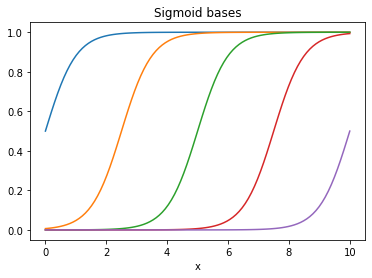

In [12]:
D=5
sigmoid = lambda x,mu, s: 1/(1 + np.exp(-(x - mu)/s))
mu = np.linspace(0,10,D)
phi = sigmoid(x[:,None], mu[None,:], .5)
for d in range(D):
    plt.plot(x, phi[:,d], '-')
plt.xlabel('x')
plt.title('Sigmoid bases')
plt.show()

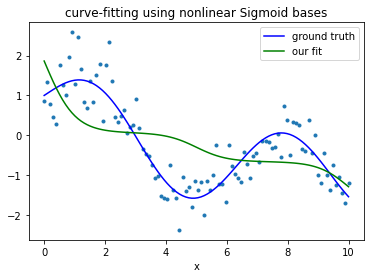

In [ ]:
yh = model.fit(phi,y).predict(phi)
fig, ax = plt.subplots()
plt.plot(x, y, '.')
plt.plot(x, yt, 'b-', label='ground truth')
plt.plot(x, yh, 'g-', label='our fit')
#for d in range(D):
#    plt.plot(x, model.w[d]*phi[:,d], '-', alpha=.5)
#plt.plot(x, model.w[-1]*np.ones_like(y), label='intercept')
plt.legend()
plt.xlabel('x')
plt.title('curve-fitting using nonlinear Sigmoid bases')
plt.show()